In [1]:
import nibabel as nib
from dipy.io.streamline import load_tractogram, StatefulTractogram
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls /Users/arokem/AFQ_data/stanford_hardi/derivatives/afq/sub-01/ses-01/clean_bundles/

sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ARC_L_tractography.json
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ARC_L_tractography.trk
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ARC_R_tractography.json
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ARC_R_tractography.trk
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ATR_L_tractography.json
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ATR_L_tractography.trk
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ATR_R_tractography.json
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ATR_R_tractography.trk
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-CGC_L_tractography.json
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-CGC_L_tractography.trk
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-CGC_R_tractography.json
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-CGC_R_tractography.trk
sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-CST_L_tractography.json
sub-0

In [3]:
ses_folder = f"/Users/arokem/AFQ_data/stanford_hardi/derivatives/afq/sub-01/ses-01"

In [4]:
fa_img = nib.load(f"{ses_folder}/sub-01_ses-01_dwi_model-DTI_FA.nii.gz")

In [5]:
tgm = load_tractogram(
    f"{ses_folder}/clean_bundles/sub-01_ses-01_dwi_space-RASMM_model-CSD_desc-det-AFQ-ARC_R_tractography.trk",
    fa_img)

tgm.to_vox()

In [6]:
len(tgm.streamlines)

10360

In [7]:
import dipy.tracking.streamline as dts

In [8]:
fgarray = np.array(dts.set_number_of_points(tgm.streamlines, 100))

In [9]:
fa = fa_img.get_fdata()

In [10]:
tgm_fa = dts.values_from_volume(fa, fgarray, np.eye(4))

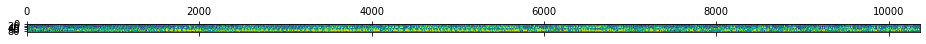

In [11]:
plt.matshow(tgm_fa.T)

In [12]:
tgm_fa.shape

(10360, 100)

In [13]:
import fastdtw

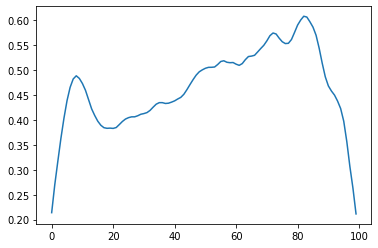

In [14]:
plt.plot(np.mean(tgm_fa, 0))

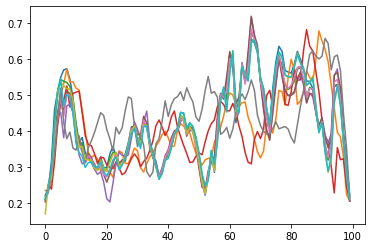

In [15]:
plt.plot(tgm_fa[:10].T)

In [115]:
fastdtw.dtw(tgm_fa[0], np.mean(tgm_fa, 0))

(5.370676562677316,
 [(0, 0),
  (1, 1),
  (2, 2),
  (2, 3),
  (3, 4),
  (3, 5),
  (3, 6),
  (4, 7),
  (5, 8),
  (6, 8),
  (7, 9),
  (8, 10),
  (9, 11),
  (10, 12),
  (10, 13),
  (10, 14),
  (11, 15),
  (12, 16),
  (13, 17),
  (14, 18),
  (15, 19),
  (16, 20),
  (17, 20),
  (18, 20),
  (19, 20),
  (20, 20),
  (21, 20),
  (22, 20),
  (23, 20),
  (24, 20),
  (25, 20),
  (26, 20),
  (27, 20),
  (28, 20),
  (29, 20),
  (30, 20),
  (31, 20),
  (32, 20),
  (33, 20),
  (34, 20),
  (35, 20),
  (36, 20),
  (37, 20),
  (38, 20),
  (39, 20),
  (40, 20),
  (41, 21),
  (42, 22),
  (42, 23),
  (43, 24),
  (43, 25),
  (43, 26),
  (43, 27),
  (43, 28),
  (43, 29),
  (43, 30),
  (43, 31),
  (43, 32),
  (44, 33),
  (45, 34),
  (46, 34),
  (47, 35),
  (48, 36),
  (49, 37),
  (50, 38),
  (51, 39),
  (52, 40),
  (53, 41),
  (54, 42),
  (55, 43),
  (56, 44),
  (57, 45),
  (57, 46),
  (57, 47),
  (57, 48),
  (57, 49),
  (57, 50),
  (58, 51),
  (58, 52),
  (58, 53),
  (58, 54),
  (58, 55),
  (58, 56),
  (58, 5

In [17]:
mdf = dts.bundles_distances_mdf(fgarray, fgarray)

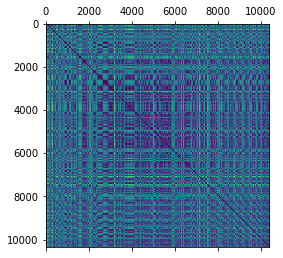

In [18]:
plt.matshow(mdf)

In [19]:
def coeff_of_determination(data, model, axis=-1):
    """
     http://en.wikipedia.org/wiki/Coefficient_of_determination
              _                                            _
             |    sum of the squared residuals              |
    R^2 =    |1 - ---------------------------------------   | * 100
             |_    sum of the squared mean-subtracted data _|
    """

    X = np.empty((data.shape[0], model.shape[0]))
    demeaned_data = data - np.mean(data, axis=axis)[...,np.newaxis]
    ss_tot = np.sum(demeaned_data **2, axis=axis)
    # Don't divide by 0:
    if np.all(ss_tot==0.0):
        X[:, :] = np.nan
        return X

    for ii in range(X.shape[0]):
        for jj in range(X.shape[1]):
            # There's no point in doing any of this: 
            if np.all(data[ii]==0.0) and np.all(model[ii]==0.0):
                X[ii, jj] = np.nan
            else:
                residuals = data[ii] - model[jj]
                ss_err = np.sum(residuals ** 2, axis=axis)
                X[ii, jj] = 1 - (ss_err/ss_tot[ii])

    
    return X

In [20]:
X = coeff_of_determination(tgm_fa, tgm_fa)

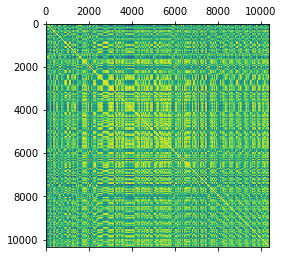

In [21]:
plt.matshow(mdf.max() - mdf)

In [22]:
scaled_mdf = (mdf.max() - mdf)
scaled_mdf = scaled_mdf / scaled_mdf.max()

In [23]:
copy_X = X[:]

In [24]:
copy_X[copy_X<0] = 0

(array([78460167.,  7777200.,  6743582.,  5217280.,  3557310.,  2250629.,
         1400628.,   940649.,   621695.,   360460.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

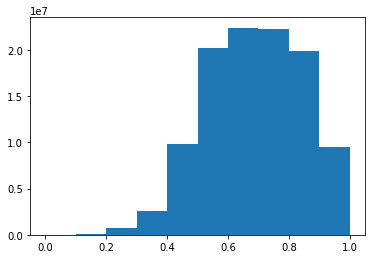

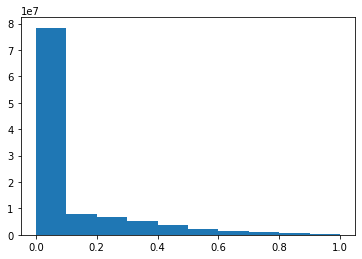

In [25]:
fig, ax = plt.subplots(1)
ax.hist(scaled_mdf.ravel())
fig, ax = plt.subplots(1)
ax.hist(copy_X.ravel())

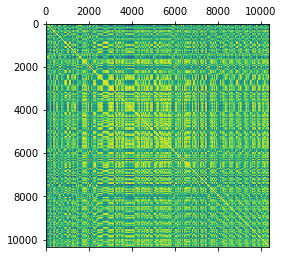

In [26]:
plt.matshow(scaled_mdf)

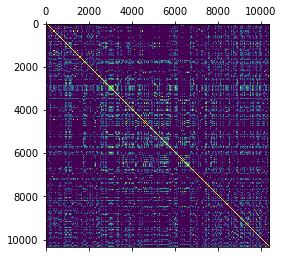

In [27]:
plt.matshow(X)

In [28]:
import sklearn.cluster as skc

In [75]:
alpha = 0.3
beta = 1 - alpha

In [76]:
cluster_matrix = alpha * scaled_mdf + beta * copy_X

In [77]:
from sklearn.decomposition import PCA

In [95]:
my_pca = PCA(0.7)

In [96]:
my_pca.fit(cluster_matrix)

PCA(n_components=0.7)

4


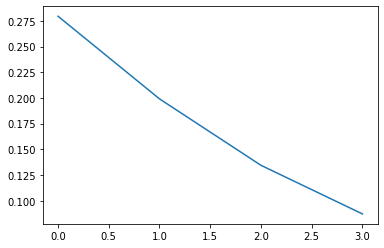

In [97]:
plt.plot(my_pca.explained_variance_ratio_)
print(my_pca.n_components_)

In [98]:
clf = skc.SpectralClustering(affinity="precomputed", n_clusters=my_pca.n_components_)

In [99]:
clf.fit(cluster_matrix)

/Users/arokem/miniconda3/envs/afq/lib/python3.8/site-packages/sklearn/utils/validation.py:72: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(**kwargs)


SpectralClustering(affinity='precomputed', n_clusters=4)

In [100]:
np.unique(clf.labels_)

array([0, 1, 2, 3], dtype=int32)

In [101]:
a = 1

In [102]:
from palettable.tableau import Tableau_10

In [103]:
cc = Tableau_10.colors

In [104]:
color_dict = {}
for ll in clf.labels_:
    color_dict.update({ll:np.array(cc[ll])/255})
    #color_dict.update({ll:cc[ll]})
color_dict.update({-1:(0, 0, 0)})

In [105]:
color_dict

{0: array([0.12156863, 0.46666667, 0.70588235]),
 2: array([0.17254902, 0.62745098, 0.17254902]),
 3: array([0.83921569, 0.15294118, 0.15686275]),
 1: array([1.        , 0.49803922, 0.05490196]),
 -1: (0, 0, 0)}

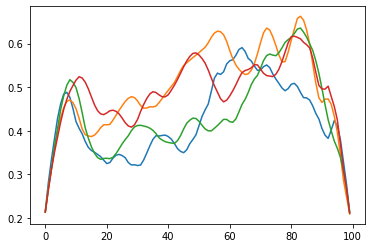

In [106]:
fig, ax = plt.subplots(1)
for ll in np.unique(clf.labels_):
    ax.plot(np.mean(tgm_fa[np.where(clf.labels_ == ll)], 0), color=color_dict[ll])

In [107]:
colors = [color_dict[kk] for kk in clf.labels_] 

In [108]:
from dipy.viz import window, actor, ui

In [109]:
from AFQ.viz import fury_backend as viz

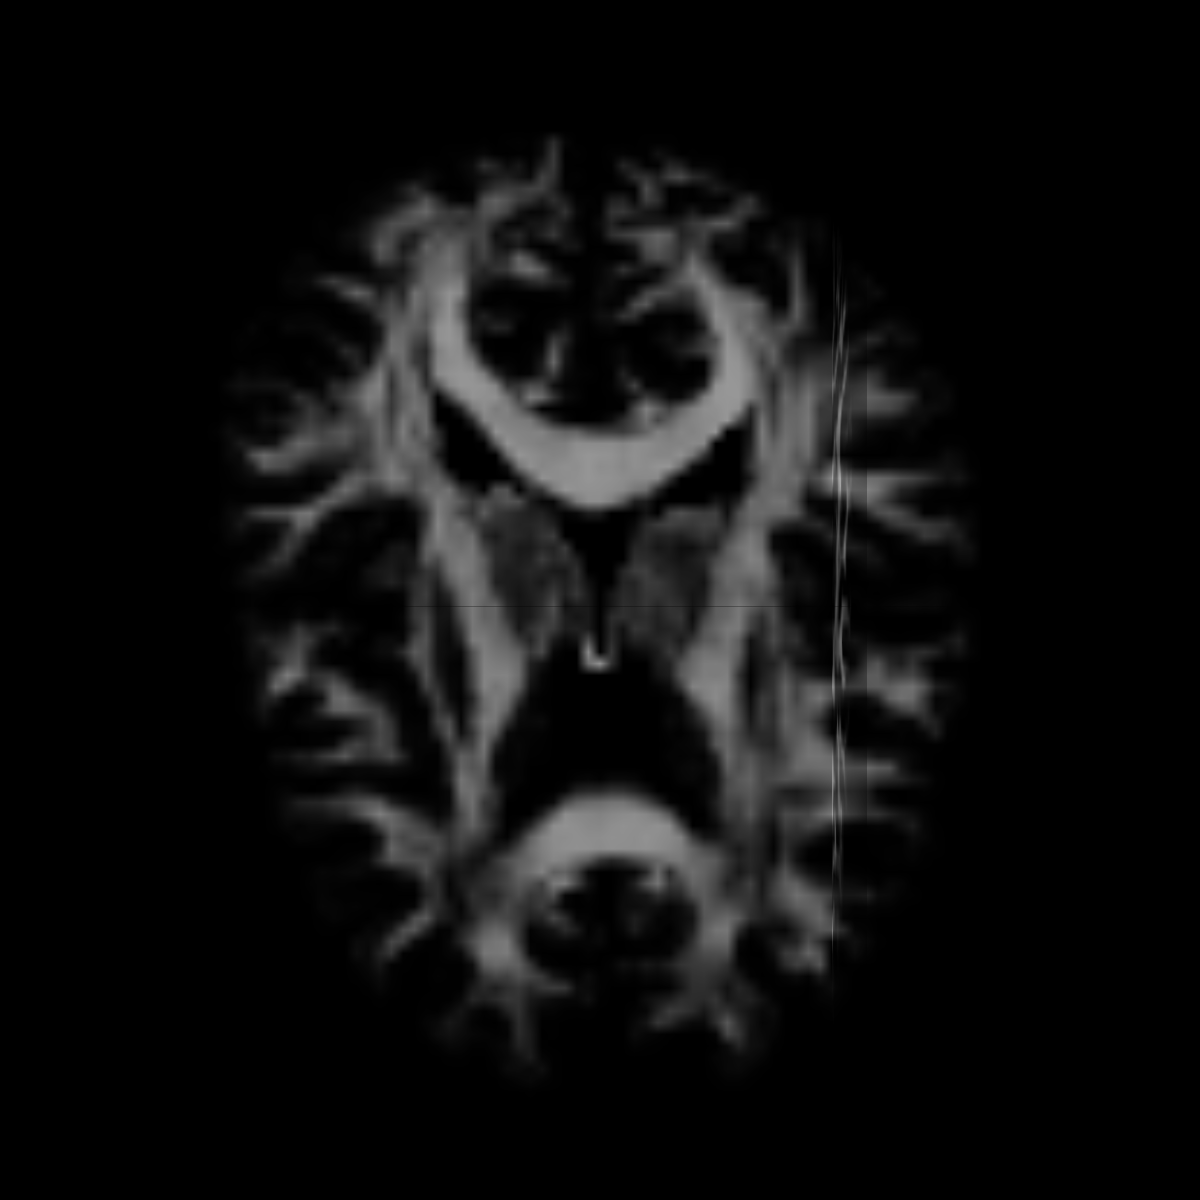

In [110]:
figure = viz.visualize_volume(fa, x=60)

In [111]:
colors = [Tableau_10.colors[9] for kk in clf.labels_] 

colors = [color_dict[kk] for kk in clf.labels_] 

In [112]:
figure.SetBackground(1, 1, 1)
sl_actor = actor.line(tgm.streamlines, colors)
figure.add(sl_actor)
sl_actor.GetProperty().SetRenderLinesAsTubes(1)
sl_actor.GetProperty().SetLineWidth(6)
window.show(figure)

In [113]:
# #figure = window.Scene()

# figure.SetBackground(1, 1, 1)
# sl_actor = actor.line(slf_tgm.streamlines, colors)
# figure.add(sl_actor)
# sl_actor.GetProperty().SetRenderLinesAsTubes(1)
# sl_actor.GetProperty().SetLineWidth(6)

# window.show(figure)

In [114]:
# ss = afv.visualize_bundles(slf_tgm, colors=colors, interact=True)